In [ ]:
#qiskit and plot imports
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from matplotlib import pyplot as plt

In [ ]:
# save your token to your ibm_quantum account
QiskitRuntimeService.save_account(
    overwrite=True,
    channel="ibm_quantum",
    token="ee8307bf15828b52bfccbb96227b8bff3e08f3d8cab98ed7cdcb6305c79711224e5b1e1b3e045bfb1cc7d9aca3d4769e0a6e2ede465037821c42a0ab6632958f"
)

In [ ]:
#current_circuit.py import
from current_circuit import *

In [ ]:
#configure your service
service = QiskitRuntimeService()

In [ ]:
#list all available backends
"""available_backends = service.backends()
available_backends"""

'available_backends = service.backends()\navailable_backends'

In [ ]:
#create a list with the names of the available backends
"""list_of_backends = []
for backend in available_backends:
    backend_name = str(backend)
    backend_name = backend_name.replace("<IBMBackend('","")
    backend_name = backend_name.replace("')>","")
    list_of_backends.append(backend_name)
"""

'list_of_backends = []\nfor backend in available_backends:\n    backend_name = str(backend)\n    backend_name = backend_name.replace("<IBMBackend(\'","")\n    backend_name = backend_name.replace("\')>","")\n    list_of_backends.append(backend_name)\n'

In [ ]:
"""list_of_backends"""

'list_of_backends'

In [ ]:
#select your backend
"""print("Select your backend: ")
backend_index = input()
backend_name = list_of_backends[int(backend_index)]
backend = service.backend(backend_name)"""

'print("Select your backend: ")\nbackend_index = input()\nbackend_name = list_of_backends[int(backend_index)]\nbackend = service.backend(backend_name)'

In [ ]:
#defines the quantum circuit
quantum_circuit = current_circuit()
qc = quantum_circuit.get_current_circuit()
num_of_qbits = quantum_circuit.get_num_of_qbits()

In [ ]:
#transpile your circuit
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=num_of_qbits)
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=1)
qc_transpiled = pass_manager.run(qc)
sampler = Sampler(backend)

In [ ]:
#run your circuit with samples
job = sampler.run([qc_transpiled])
result = job.result()

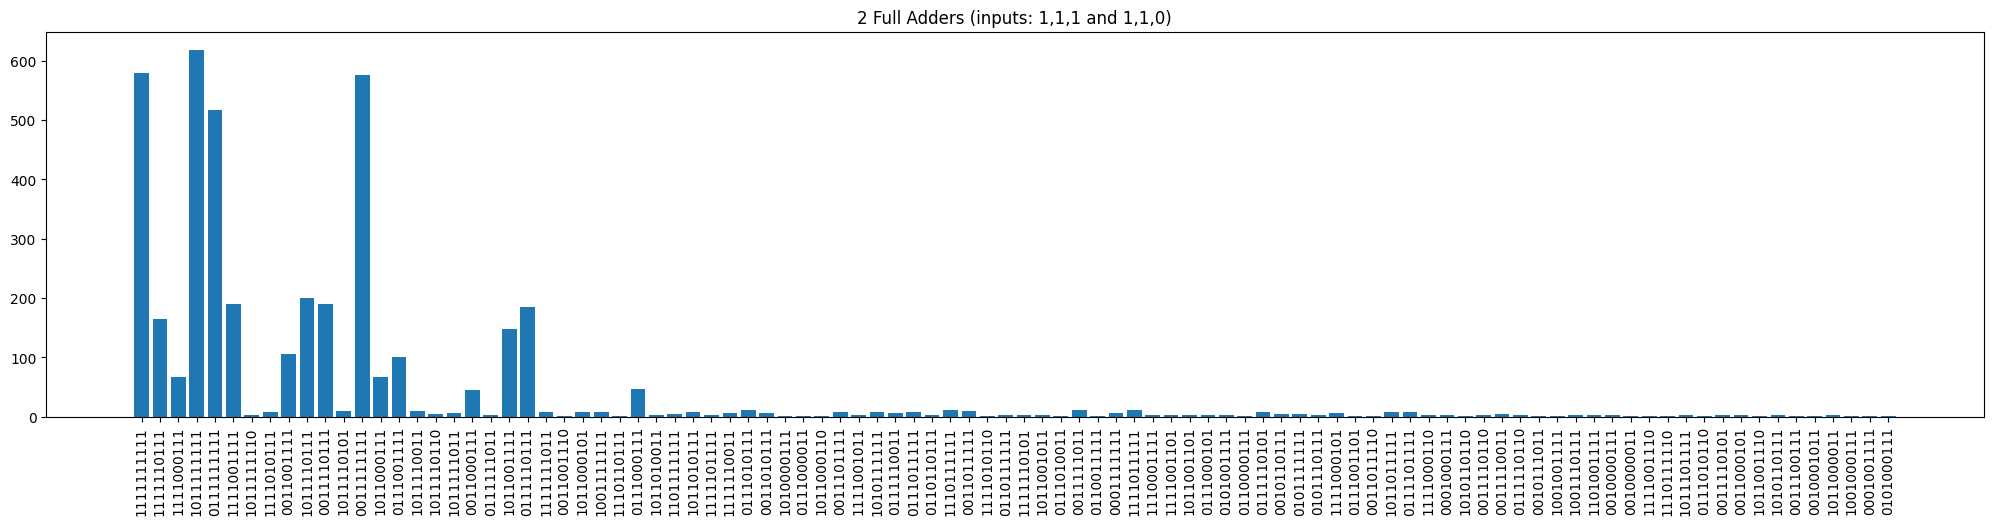

In [ ]:
#plot your histogram with results and save image
data = result[0].data.c.get_counts()
names = list(data.keys())
values = list(data.values())

plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.title("2 Full Adders (inputs: 1,1,1 and 1,1,0)")
plt.bar(names, values, tick_label=names)
plt.savefig("results/real-run.png", bbox_inches="tight")
plt.show()